In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split

def load_catdog():
    base_dir = '/gdrive/My Drive/Colab Notebooks/산협프/dogcat/PetImages'
    cat_dir = os.path.join(base_dir, 'Cat')
    dog_dir = os.path.join(base_dir, 'Dog')

    if os.path.isfile('/gdrive/My Drive/Colab Notebooks/산협프/dogcat/PetImages/Cat/666.jpg'):
        os.remove('/gdrive/My Drive/Colab Notebooks/산협프/dogcat/PetImages/Cat/666.jpg')

    if os.path.isfile('/gdrive/My Drive/Colab Notebooks/산협프/dogcat/PetImages/Dog/11702.jpg'):
        os.remove('/gdrive/My Drive/Colab Notebooks/산협프/dogcat/PetImages/Dog/11702.jpg')

    X_train = []
    y_train = [int(i >= 2000) for i in range(4000)] # 0~1999 : 0, 2000~3999 : 1

    # cat : 0, dog : 1
    count = 0
    for cat_img in os.listdir(cat_dir)[:2000]:
        img = load_img(os.path.join(cat_dir, cat_img), target_size=(224, 224))
        img = np.asarray(img)

        X_train.append(img)
        count += 1

        if count % 100 == 0:
            print('%d Cat Images Loaded' % count)

    count = 0
    for dog_img in os.listdir(dog_dir)[:2000]:
        img = load_img(os.path.join(dog_dir, dog_img), target_size=(224, 224))
        img = np.asarray(img)

        X_train.append(img)
        count += 1

        if count % 100 == 0:
            print('%d Dog Images Loaded' % count)


    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=1004)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1005)
    
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [3]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_catdog()

100 Cat Images Loaded
200 Cat Images Loaded
300 Cat Images Loaded
400 Cat Images Loaded
500 Cat Images Loaded
600 Cat Images Loaded
700 Cat Images Loaded
800 Cat Images Loaded
900 Cat Images Loaded
1000 Cat Images Loaded
1100 Cat Images Loaded
1200 Cat Images Loaded
1300 Cat Images Loaded
1400 Cat Images Loaded
1500 Cat Images Loaded
1600 Cat Images Loaded
1700 Cat Images Loaded
1800 Cat Images Loaded
1900 Cat Images Loaded
2000 Cat Images Loaded
100 Dog Images Loaded
200 Dog Images Loaded
300 Dog Images Loaded
400 Dog Images Loaded
500 Dog Images Loaded
600 Dog Images Loaded
700 Dog Images Loaded
800 Dog Images Loaded
900 Dog Images Loaded
1000 Dog Images Loaded
1100 Dog Images Loaded
1200 Dog Images Loaded
1300 Dog Images Loaded
1400 Dog Images Loaded
1500 Dog Images Loaded
1600 Dog Images Loaded
1700 Dog Images Loaded
1800 Dog Images Loaded
1900 Dog Images Loaded


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

2000 Dog Images Loaded


In [4]:
print('X_train.shape :', X_train.shape)
print('y_train.shape :', y_train.shape)
print('X_val.shape :', X_val.shape)
print('y_val.shape :', y_val.shape)
print('X_test.shape :', X_test.shape)
print('y_test.shape :', y_test.shape)

X_train.shape : (2560, 224, 224, 3)
y_train.shape : (2560,)
X_val.shape : (640, 224, 224, 3)
y_val.shape : (640,)
X_test.shape : (800, 224, 224, 3)
y_test.shape : (800,)


In [5]:
X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [7]:
from tensorflow.keras import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization

densenet_layers = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in densenet_layers.layers:
    layer.trainable = False

x = densenet_layers.output

x = Dense(1024, activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(2, activation='sigmoid')(x)

model = Model(inputs=densenet_layers.input, outputs=x)

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 50
batch_size = 64

callback_list = [
    EarlyStopping(monitor='val_loss', patience=3)
]

model.fit(X_train, y_train,
          epochs=epochs,
          callbacks=callback_list,
          batch_size=batch_size,
          validation_data=(X_val, y_val))

Epoch 1/50
40/40 [==============================] - 32s 794ms/step - loss: 0.1046 - acc: 0.9719 - val_loss: 0.3453 - val_acc: 0.9500
Epoch 2/50
40/40 [==============================] - 28s 706ms/step - loss: 0.0246 - acc: 0.9934 - val_loss: 0.1401 - val_acc: 0.9828
Epoch 3/50
40/40 [==============================] - 28s 707ms/step - loss: 0.0139 - acc: 0.9973 - val_loss: 0.1473 - val_acc: 0.9781
Epoch 4/50
40/40 [==============================] - 28s 708ms/step - loss: 0.0041 - acc: 0.9992 - val_loss: 0.1263 - val_acc: 0.9828
Epoch 5/50
40/40 [==============================] - 28s 708ms/step - loss: 0.0064 - acc: 0.9984 - val_loss: 0.1283 - val_acc: 0.9828
Epoch 6/50
40/40 [==============================] - 28s 707ms/step - loss: 0.0079 - acc: 0.9992 - val_loss: 0.1683 - val_acc: 0.9797
Epoch 7/50
40/40 [==============================] - 28s 706ms/step - loss: 0.0052 - acc: 0.9984 - val_loss: 0.1836 - val_acc: 0.9781


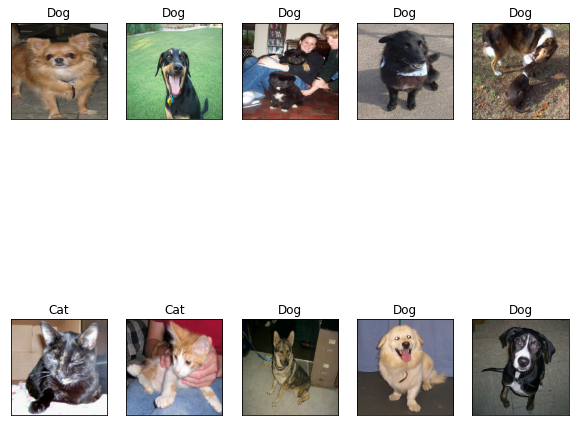

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))

for (idx, img) in enumerate(X_train[:10]):
    plt.subplot(2, 5, idx+1)
    plt.imshow(img)
    prediction = np.argmax(model.predict(np.expand_dims(X_train[idx], axis=0)))
    plt.title('Cat' if prediction == 0 else 'Dog')
    plt.xticks([])
    plt.yticks([])

In [12]:
model.save('/gdrive/My Drive/Colab Notebooks/산협프/dogcat/cats_and_dog_densenet.h5')